In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("entropy_4.xlsx")
df = pd.DataFrame(data)
df = df.dropna(axis = 1)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [6]:
import math

def entropy(data):
    count = {}
    total = len(data)
    for row in data:
        label = row[-1]
        if label not in count:
            count[label] = 0
        count[label] += 1
    entropy = 0
    for label in count:
        prob = count[label] / total
        entropy -= prob * math.log2(prob)
    return entropy


def information_gain(data, attribute_index):
    attribute_values = {}
    total = len(data)
    for row in data:
        value = row[attribute_index]
        if value not in attribute_values:
            attribute_values[value] = []
        attribute_values[value].append(row)
    gain = entropy(data)
    for value, subset in attribute_values.items():
        prob = len(subset) / total
        gain -= prob * entropy(subset)
    return gain


attributes = ["age", "income", "student", "credit_rating"]


ig_values = {}
for i, attribute in enumerate(attributes):
    ig = information_gain(data, i)
    ig_values[attribute] = ig


root_node = max(ig_values, key=ig_values.get)

print("Information Gain for each attribute:")
for attribute, ig in ig_values.items():
    print(f"{attribute}: {ig}")

print(f"The root node for the decision tree is: {root_node}")

Information Gain for each attribute:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.048127030408269544
The root node for the decision tree is: age


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

X = [row[:-1] for row in data]
y = [row[-1] for row in data]


label_encoders = [LabelEncoder() for _ in range(len(X[0]))]

for i in range(len(label_encoders)):
    X_column = [row[i] for row in X]
    X_column_encoded = label_encoders[i].fit_transform(X_column)
    for j in range(len(X)):
        X[j][i] = X_column_encoded[j]

model = DecisionTreeClassifier()
model.fit(X, y)
tree_depth = model.get_depth()
print("Depth of the constructed tree:", tree_depth)

Depth of the constructed tree: 4


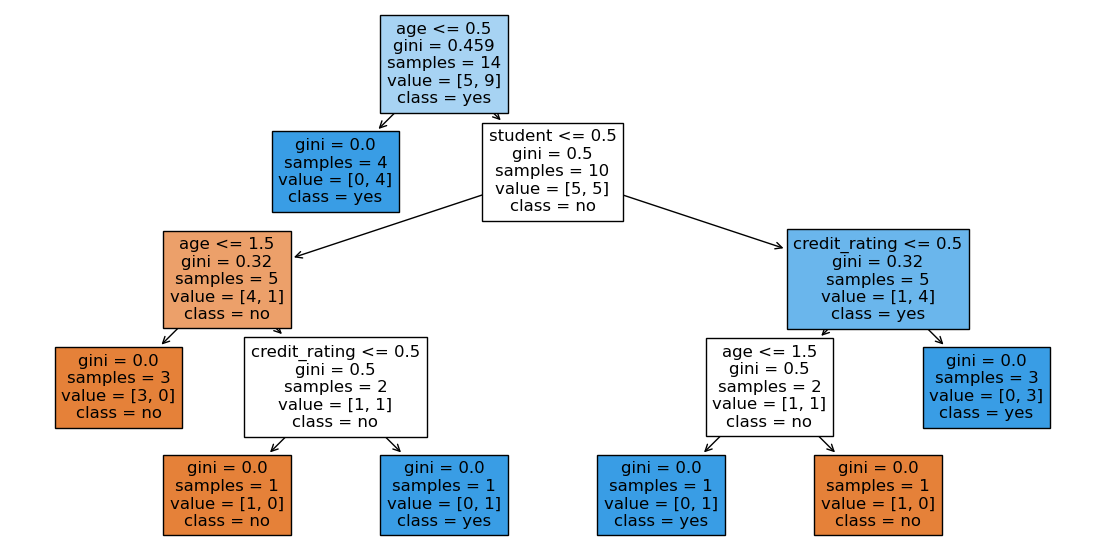

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

model = DecisionTreeClassifier()

model.fit(X, y)
plt.figure(figsize=(14, 7))
plot_tree(model, filled=True, feature_names=["age", "income", "student", "credit_rating"], class_names=["no", "yes"])
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

combined_X = Tr_X + Te_X

label_encoders = [LabelEncoder() for _ in range(len(Tr_X[0]))]

for i in range(len(label_encoders)):
    combined_X_column = [row[i] for row in combined_X]
    combined_X_column_encoded = label_encoders[i].fit_transform(combined_X_column)
    
    for j in range(len(combined_X)):
        combined_X[j][i] = combined_X_column_encoded[j]

Tr_X_encoded = combined_X[:len(Tr_X)]
Te_X_encoded = combined_X[len(Tr_X):]

model = DecisionTreeClassifier()
model.fit(Tr_X_encoded, Tr_y)

training_accuracy = model.score(Tr_X_encoded, Tr_y)
test_accuracy = model.score(Te_X_encoded, Te_y)

print("Training Set Accuracy:", training_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 1.0
Test Set Accuracy: 0.3333333333333333


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=5)

model.fit(Tr_X_encoded, Tr_y)

Tr_y_pred = model.predict(Tr_X_encoded)
Te_y_pred = model.predict(Te_X_encoded)

training_accuracy = accuracy_score(Tr_y, Tr_y_pred)
test_accuracy = accuracy_score(Te_y, Te_y_pred)

print("Training Set Accuracy (with max_depth constraint):", training_accuracy)
print("Test Set Accuracy (with max_depth constraint):", test_accuracy)

Training Set Accuracy (with max_depth constraint): 1.0
Test Set Accuracy (with max_depth constraint): 0.3333333333333333


Training Set Accuracy =  1.0
Test Set Accuracy =  0.6666666666666666


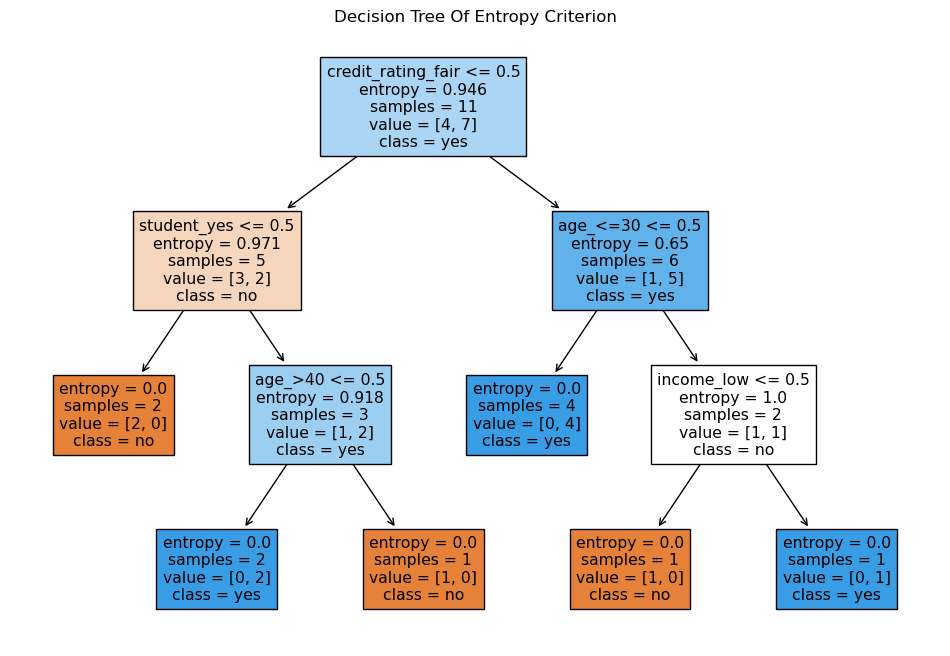

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

model_entropy = DecisionTreeClassifier(criterion="entropy")

model_entropy.fit(X_train, y_train)

training_accuracy_entropy = model_entropy.score(X_train, y_train)
print("Training Set Accuracy = ", training_accuracy_entropy)

test_accuracy_entropy = model_entropy.score(X_test, y_test)
print("Test Set Accuracy = ", test_accuracy_entropy)

plt.figure(figsize=(12, 8))
plot_tree(model_entropy, filled=True, feature_names=X.columns.tolist(), class_names=model_entropy.classes_.astype(str))
plt.title("Decision Tree Of Entropy Criterion")
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_excel("entropy_4.xlsx")
feature_columns = ['age', 'income', 'student', 'credit_rating']
data_encoded = pd.get_dummies(data[feature_columns], drop_first=True)

X = data_encoded
y = data['buys_computer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_decision_tree)
print("Classification Report:\n", classification_report_decision_tree)
print("Confusion Matrix:\n", confusion_matrix_decision_tree)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

y_pred_random_forest = random_forest.predict(X_test)


accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
classification_report_random_forest = classification_report(y_test, y_pred_random_forest)
confusion_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

print("\nRandom Forest Classifier Performance:")
print("Accuracy:", accuracy_random_forest)
print("Classification Report:\n", classification_report_random_forest)
print("Confusion Matrix:\n", confusion_matrix_random_forest)

Decision Tree Classifier Performance:
Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

          no       0.00      0.00      0.00         1
         yes       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

Confusion Matrix:
 [[0 1]
 [1 1]]

Random Forest Classifier Performance:
Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

          no       0.50      1.00      0.67         1
         yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Confusion Matrix:
 [[1 0]
 [1 1]]


In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = pd.read_excel("entropy_4.xlsx")

imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data_encoded = pd.get_dummies(data, columns=['age', 'income', 'student', 'credit_rating'])

X = data_encoded.drop(columns='buys_computer')
y = data_encoded['buys_computer']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance:.4f}")

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Feature Importances:
Feature 1: 0.0623
Feature 2: 0.0992
Feature 3: 0.0826
Feature 4: 0.0757
Feature 5: 0.0538
Feature 6: 0.0426
Feature 7: 0.1461
Feature 8: 0.1749
Feature 9: 0.1408
Feature 10: 0.0256
Feature 11: 0.0963
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

          no       0.50      0.50      0.50         2
         yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

Confusion Matrix:
 [[1 1]
 [1 2]]
